# Visualization of Dataset HTRU2

## Dataset HTRU2


HTRU2 is a subset of the HTRU (High Time Resolution Universe), an astronomical survey funded by the Commonwealth of Australia and managed by the CSIRO. It is formated as a table with 17898 total rows, representing pulsar candidates, and 9 atributes represented by columns. It can be freely accessed at https://archive.ics.uci.edu/dataset/372/htru2

### 1.Atributes

HTRU-2 represents the Mean, Standard Deviation, Excess Kurtosis, and Skewness for each candidate’s signal, both for the integrated pulse profile pulse and the DM-SNR curve, for a total of eight values, as well as a binary label classifying it as pulsar or not pulsar.
The four “Ip” values correspond to simple statistics obtained from the integrated pulse profile (folded pulse profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. 
The remaining four variables are similarly obtained from the DM-SNR curve, a signal power to noise power ratio . More information on these variables and what they represent can be found in Annex 2.

### 2.Characteristics of the Dataset

HTRU-2 is a very unbalanced dataset.
The dataset contains 17898 total samples, 1639 of which are true pulsars. This leaves 16,259 false pulsar candidates in the dataset. These examples have all been checked by human annotators
The data contains no positional information or other astronomical details, and is not normalized. 

The following code aims to offer more insight into the correlations between attributes, and wether supervised algorithms might be a useful tool to classify this type of data.

### 3. Atributes of the Elements
The dataset provides the mean, standard deviation, excess kurtosis and skewness of both the intergated profile (also known as folded profile) of the detected pulses, and of their DM-SNR curve. Statistics referring to the integrated pulse are indicated by "IP", while those from the SNR curve have "SNR" in the name. For more information on what Integrated profiles and SNR curves represent, see Annex 2. 

- Mean: the average of a distribution.
- Standard Deviation:a quantity calculated to indicate the extent of deviation of datapoints of the distriburion.
- Excess Kurtosis:the sharpness of the peak of a frequency-distribution curve.
- Skewness:a measure of the asymmetry of the distribution.


*Definitions quoted form the Oxford Dictionary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#FOR THE GIVEN DATA

In [3]:
#The data is cleaned and normalized by the Auziliary methods

%run Aux_Methods.ipynb

df = pd.read_csv("HTRU_2.csv")
df=prepare_data(df,0)
class_key=df.keys()[len(df.keys())-1]

df.head()

The final dataset contains 17898 samples


,Mean_IP,Standard_Dev_IP,E_Kurtosis_IP,Skewness_IP,Mean_SNR,Standard_Dev_SNR,E_Kurtosis_SNR,Skewness_SNR,Class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0.0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0.0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0.0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0.0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0.0


### Correlation Plot

This plot allows us to estimate which atributes correlate with the final label, and with eachother. It allows us to identify information that may be redundant or unrelated with the clasification task, and eliminate it from the dataset.

<Axes: >

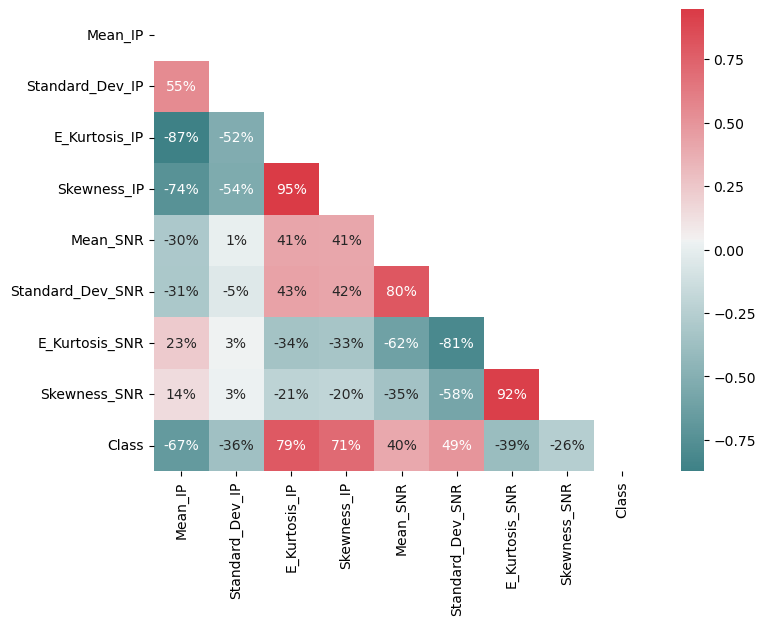

In [4]:
plt.figure(figsize=(8, 6))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr , annot=True, fmt='.0%', mask=mask, cmap=cmap,)

### Results
This plot revealed that all attributes held some correlation with the label, even though some of them held a very weak one. The atribute from the SNR curve that correlated the strongest with the label was the standard deviation, while this was the least relevant atribute from the IP profile to the final result. In general, the statistics from the Ip profile prove to have a stronger correlation to the outcome than those from the SNR curve.

Looking at this plot, we estimate that we coulod drop the E_Kurtois_SNR and Skewness_SNR from the dataset, if needed, without damaging the results significatively. Furthermore, considering the strong correlation bewteen Mean_SNR and Standard_Dev_SNR, it is likely that Mean_SNR could be dropped too. 

There are some strong correlations between the atributes as well. Mean IP correlated very strongly with E_Kurtois_Ip and Skewness_Ip, which also correlated strongly with each other. Standard Deviation Ip also correlated strongly with  E_Kurtois_Ip and Skewness_Ip, and has no correlation with any of the values from our noise-signal curve.

These strong correlations between attributes suggested that it should be possible to reduce the number of attributes represented in each object, if it were to be necessary due to technical constraints.


## Plots by Class

The following plots allow us to observe wether there are differences between the atribute distribution of the pulsars vs that of the non pulsars that the algorithms can pick on and utilize to classify new samples.

### Density Plot

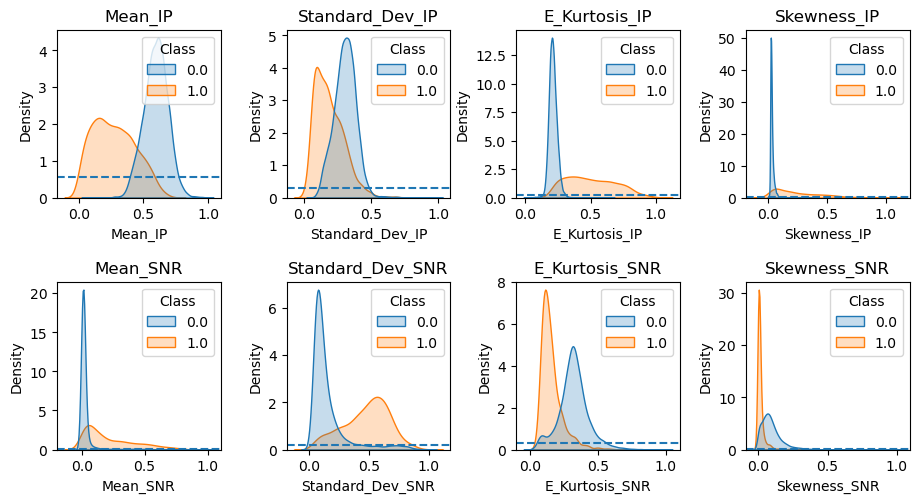

In [5]:
%run Aux_Methods.ipynb
density_plot(df, "Original Dataset")

### Strip Plot

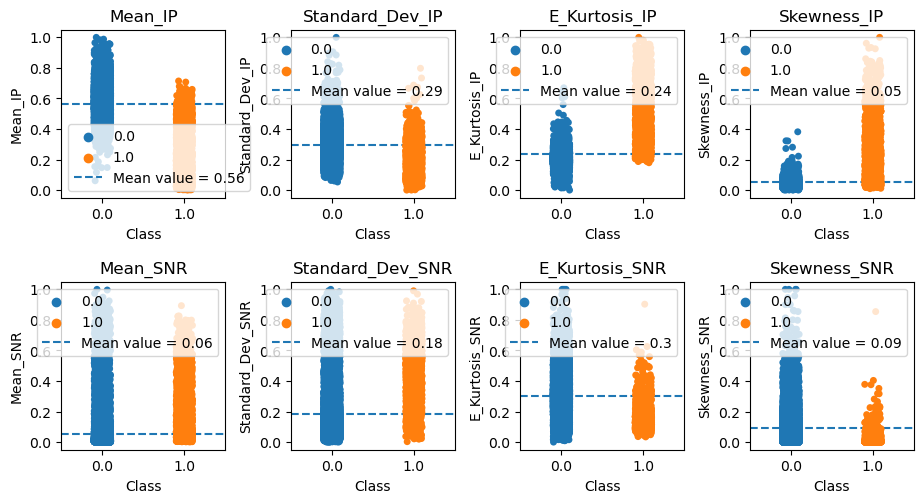

In [6]:
strip_plot(df, "Original Dataset")

### Violin Plot

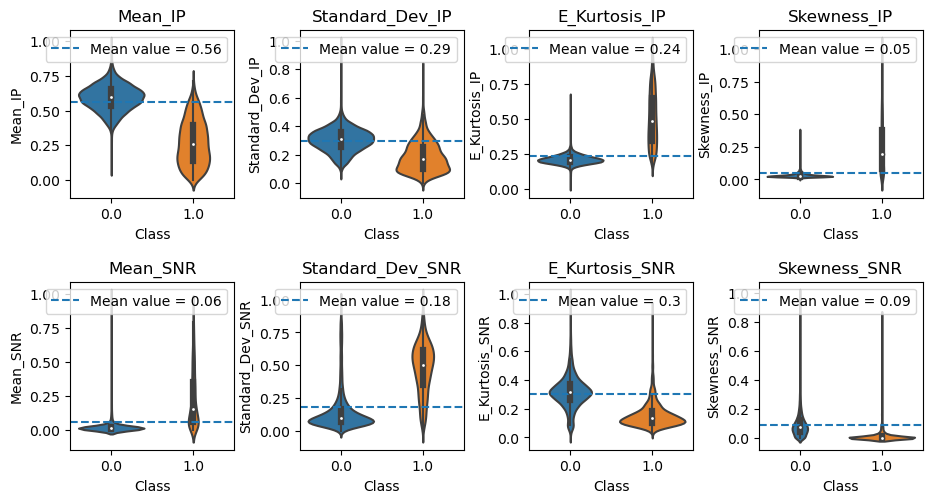

In [7]:
violin_plot(df, "Original Dataset")

### Results
The atributes that showed the clearest difference in distribution between true pulsars and false pulsars were the Mean_IP, E_Kurtosis_IP, and Skewness_IP. Standard_Dev_SNR also showed a characteristic different in density distribution between both classes, but not as pronounced as the other three atributes. This results are consistent with our observations from the correlation matrix, and sugest that a supervised leanring algorithm would be apropiate for this task.


## Plots after Balancing

The dataset probided is unbalanced at a ratio of 1 to 9. Training a classifier on an unbalanced dataset can raise concerns of paradoxical accuracy and overfitting, especially considering that the test set and final input will also be unbalanced. To prevent paradoxical accuracy from affecting the accuracy results of our classifiers, we must first balance the dataset.
However, balancing methods can affect the characteristics and distribution of the dataset. To observe this effect, and estimate which sampler would best preserve-or maybe even highlight-the differences between the two types of objects, we selected four undersamplers -three selective, and one random- and applied them to the dataset. Then, the dataset was plotted for visualization.
The violin plot combines the range and the density of each atribute in a single figure. For this reason it was chosen as the best plotting method for the task.

In [8]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule

samplers = [
    AllKNN(),
    TomekLinks(),
    RandomUnderSampler(random_state=0),
    NeighbourhoodCleaningRule(n_neighbors=4),
]
samplers_names = [
    "AllKNN()",
    "TomekLinks()",
    "RandomUnderSampler(random_state=0)",
    "NeighbourhoodCleaningRule(n_neighbors=4)",
]

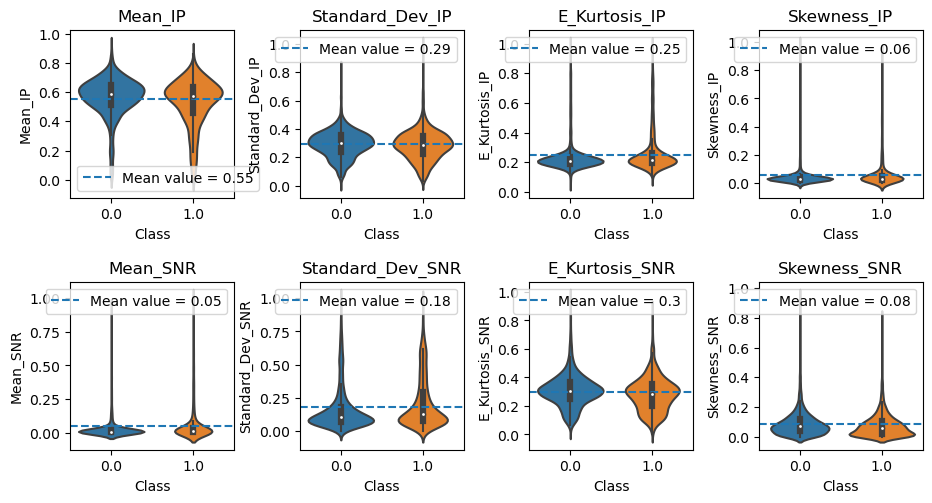

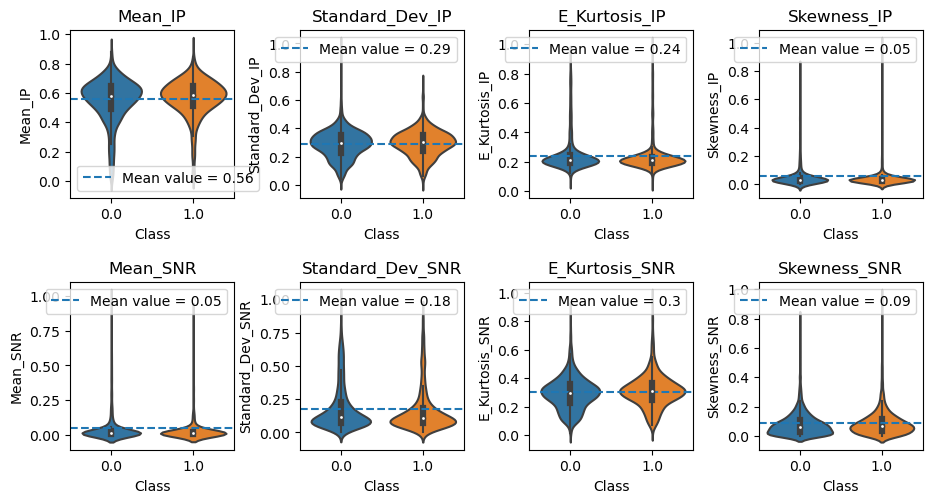

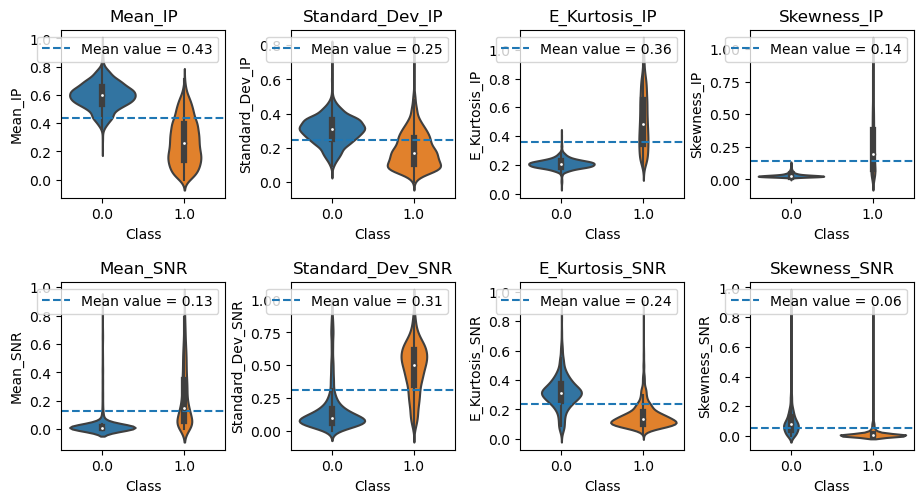

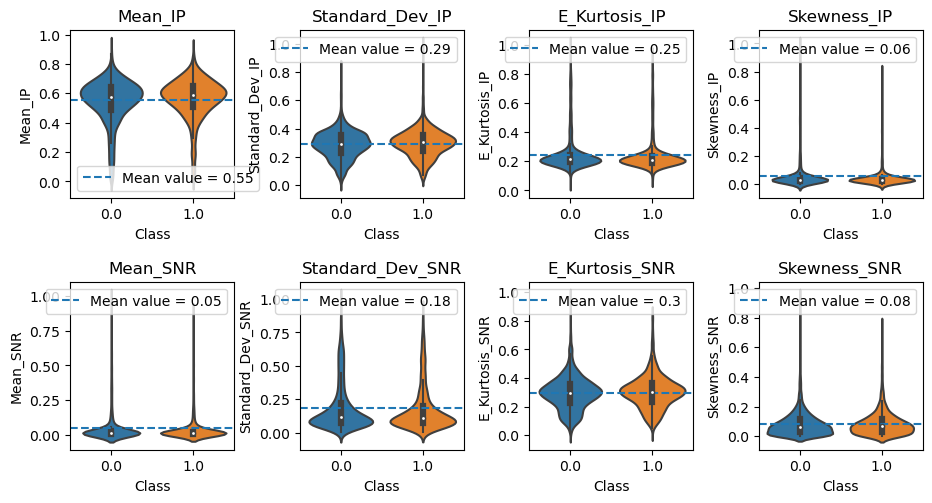

In [9]:
for sampler, name in zip(samplers, samplers_names):
    df_bal = get_balanced_set_undersampling(sampler, df.copy(), class_key)
    df_bal = df_bal.dropna()
    violin_plot(df_bal, f"Dataset Balanced by {name} ")


### Results

The selective under samplers trimmed off the differences between the positive and negative label groups. This will probably result in terrible performance for the learning models trained on datasets balanced thrugh these methods. The only undersampler that preserved the shape of the distributions was random undersampling..